<a href="https://colab.research.google.com/github/yashraj01-se/Pytorchrepo/blob/main/Neural_Network_classification_pytorch(Linear).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Making our Toy Dataset ready-:Basically its called toy dataset because its samller in size but its enough to practice our fundamentals...


In [155]:
import sklearn

In [156]:
from sklearn.datasets import make_circles #X is basically input features...and Y is the output label...
n_sample=1000
X,Y=make_circles(n_sample,
                noise=0.03,
                random_state=42)
print("First five sample of X:\n",X[:5])
print("First five sample of Y:",Y[:5])

First five sample of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five sample of Y: [1 1 1 1 0]


In [157]:
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                     "X2":X[:,1],
                     "label":Y[:]})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


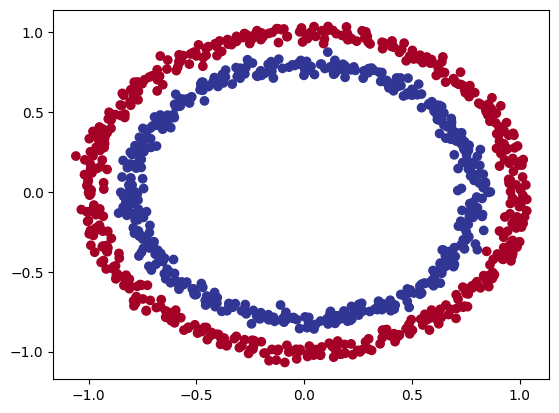

In [158]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=Y,
            cmap=plt.cm.RdYlBu)


###Turning out dataset to tensors and splitting it for training and testing:

In [159]:
X.shape,Y.shape

((1000, 2), (1000,))

In [160]:
print(type(X),type(Y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [161]:
#1.1:We have to convert a data into tensors first:
import torch
X=torch.from_numpy(X).type(torch.float32)
Y=torch.from_numpy(Y).type(torch.float32)
type(X),type(Y),X.shape,Y.shape
print(X.dtype,Y.dtype)

torch.float32 torch.float32


In [162]:
#1.2splitting our data for training and testing:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(800, 200, 800, 200)

**2. Building a model**

Let's build a model to classify our blue and red dots.

To do so, we want to:

1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop


In [163]:
#1.device agnostic code:
device="cuda" if torch.cuda.is_available() else "cpu"
#2.subclassing nn.Module:# A small neural Network to handle our data:


Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target `device`


In [164]:
import torch
from torch import nn
class circlemodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_01=nn.Linear(in_features=2,out_features=5)#basically taking 2 features as input and scaling it to 5..
    self.layer_02=nn.Linear(in_features=5,out_features=1)#basically this layer will taking output from the first layer and after computation gives an output of 1 value..
  def forward(self,x):
    return self.layer_02(self.layer_01(x))#work=x->layer_1->layer_2->output

model=circlemodel().to(device)
model

circlemodel(
  (layer_01): Linear(in_features=2, out_features=5, bias=True)
  (layer_02): Linear(in_features=5, out_features=1, bias=True)
)

In [165]:
#there is another way to create our model with nn.sequential:
from torch import nn
model_=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_ #instead of creating our own forward method, nn.Sequential creates it for us...

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [166]:
model.state_dict()

OrderedDict([('layer_01.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188]], device='cuda:0')),
             ('layer_01.bias',
              tensor([0.6146, 0.1323, 0.5224, 0.0958, 0.3410], device='cuda:0')),
             ('layer_02.weight',
              tensor([[-0.0631,  0.3448,  0.0661, -0.2088,  0.1140]], device='cuda:0')),
             ('layer_02.bias', tensor([-0.2060], device='cuda:0'))])

In [167]:
model_.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [168]:
with torch.inference_mode():
  untrained_pred=model_(X_test.to(device))
print(f"Length of our predictions:{len(untrained_pred)},Shape of prediction:{untrained_pred.shape}")
print(f"Length of our test samples:{len(X_test)},Shape of testing data:{X_test.shape}")
print(f"first 10 predictions:{torch.round(untrained_pred[:10])}")
print(f"first 10 labels:{Y_test[:10]}")

Length of our predictions:200,Shape of prediction:torch.Size([200, 1])
Length of our test samples:200,Shape of testing data:torch.Size([200, 2])
first 10 predictions:tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')
first 10 labels:tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


###Now we train our model for that first setup loss function and optimizer:

#so for regression we use nn.L1Loss()..what for regression.
###It it actually problem specific...
#Like for regression we use Mean squared error or Mean absolute error.
#For Classifiaction we use binary cross entropy or categorical cross entropy or simply cross entropy...

###for optimizer two most common is SGD and adam..

In [169]:
#setup of loss function:
loss_fn=nn.BCELoss()#logits must be passed through sigmoid activation layer prior to this...
# nn.Sequential=(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )==BCEwithLogitsLoss()
loss_fn=nn.BCEWithLogitsLoss()#BCEwithLogitsloss=sigmoid activation function is alreay built-in ...and why we choose this instead od BCEloss()..because it provide numerical stability....
#setup of optimizer:3optimizer bacically chages our parameters in such a way that loss function goes down...
optimizer=torch.optim.SGD(params=model.parameters(),
                          lr=0.1)

##Calculating the accuracy--

In [170]:
#Accuracy is how many predictions your model got correct, out of all the predictions it made.
def Accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100

  return acc

In [171]:
#first make out logits->probabilites->labels(my taking the round off or using argmax())
#so the model output is needed to be passed from some kind of activation layer like for binary classification we have sigmoid and multiclass classification we have softmax classification..

In [172]:
#logits
model.eval()
with torch.inference_mode():
  y_pred=model(X_test.to(device))
print(y_pred[:5])
print(Y_test[:5])
#logits->probabilities:
y_pred_prob=torch.sigmoid(y_pred)
print(y_pred_prob[:5])
#probabilites->label:
y_pred_label=torch.round(y_pred_prob)
print(y_pred_label[:5])

tensor([[-0.1269],
        [-0.0967],
        [-0.1908],
        [-0.1089],
        [-0.1667]], device='cuda:0')
tensor([1., 0., 1., 0., 1.])
tensor([[0.4683],
        [0.4758],
        [0.4524],
        [0.4728],
        [0.4584]], device='cuda:0')
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]], device='cuda:0')


#training loop:
#steps:1.forward pass 2. calculate the loss 3. zero_grad 4. loss backward(backward porgagation) 5. optimzer step(gradient descent..)

In [173]:
from ast import mod
#Building training and testing loop:
torch.cuda.manual_seed(42)
epochs=1000
X_train,Y_train=X_train.to(device),Y_train.to(device)
X_test,Y_test=X_test.to(device),Y_test.to(device)
for epoch in range(epochs):
  #model training:
  model.train()
  #1.Forward Pass
  y_logits=model(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2.calculate the loss function:
  #loss=loss_fn(torch.sigmoid(y_logits),
  #             y_train)#for BCELoss()
  loss=loss_fn(y_logits,#becuse we need to pass logits to the loss functions not the probability values....#BCEwithLogitsLoss()
               Y_train)
  acc=Accuracy_fn(y_true=Y_train,
                  y_pred=y_pred)
  #3.optimizer zerograd():
  optimizer.zero_grad()

  #4.loss backward():
  loss.backward()

  #5.gradient decsent:
  optimizer.step()

  ###testing loop:
  model.eval()
  with torch.inference_mode():
    #1.Forward Pass:
    test_logits=model(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #2.Calculate the loss:
    test_loss=loss_fn(test_pred,Y_test)
    test_acc=Accuracy_fn(y_true=Y_test,
                      y_pred=test_pred)


  if epoch%10==0:
    print(f"Epoch:{epoch} | Training Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Testing Loss: {test_loss:.5f}, Accuarcy: {test_acc:.2f}")


Epoch:0 | Training Loss: 0.69569, Accuracy: 50.00% | Testing Loss: 0.69315, Accuarcy: 50.00
Epoch:10 | Training Loss: 0.69403, Accuracy: 50.00% | Testing Loss: 0.69315, Accuarcy: 50.00
Epoch:20 | Training Loss: 0.69343, Accuracy: 46.00% | Testing Loss: 0.73848, Accuarcy: 48.50
Epoch:30 | Training Loss: 0.69321, Accuracy: 49.00% | Testing Loss: 0.75670, Accuarcy: 47.50
Epoch:40 | Training Loss: 0.69312, Accuracy: 49.50% | Testing Loss: 0.76650, Accuarcy: 46.50
Epoch:50 | Training Loss: 0.69308, Accuracy: 50.38% | Testing Loss: 0.76890, Accuarcy: 46.50
Epoch:60 | Training Loss: 0.69306, Accuracy: 50.50% | Testing Loss: 0.77130, Accuarcy: 46.50
Epoch:70 | Training Loss: 0.69305, Accuracy: 50.50% | Testing Loss: 0.77251, Accuarcy: 46.50
Epoch:80 | Training Loss: 0.69304, Accuracy: 50.75% | Testing Loss: 0.77251, Accuarcy: 46.50
Epoch:90 | Training Loss: 0.69303, Accuracy: 50.38% | Testing Loss: 0.77251, Accuarcy: 46.50
Epoch:100 | Training Loss: 0.69302, Accuracy: 50.50% | Testing Loss: 0.

In [174]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)
from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


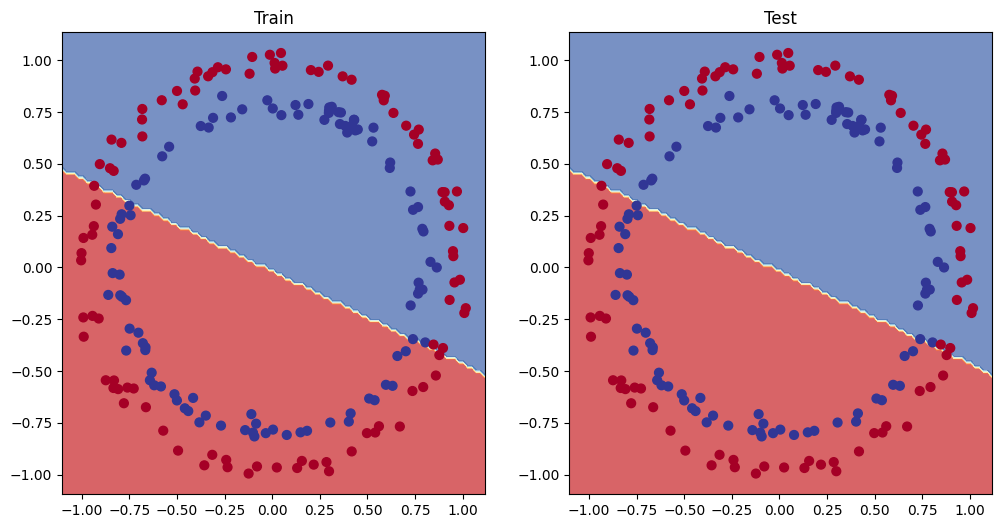

In [175]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model,X_test,Y_test)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model,X_test,Y_test)


In [176]:
#Improving our model form model's prespective:
#1.add more layers (giving more chance to learn pattern form the data)
#2.Add more hidden units like we are now 5 we can go to 10 or like something 12
#3.fit more longer
#4.cnahge the leaning rate
#5.Change the activation function
#6.Change the loss function:

:###Creating a model with more layer and Hidden units:

In [177]:
class Anothermodel(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

an_mod=Anothermodel().to(device)
an_mod

Anothermodel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [178]:
loss_function=nn.BCEWithLogitsLoss()
optimizer_an=torch.optim.Adam(params=an_mod.parameters(),lr=0.01)

In [179]:
#logits->probabilities:
y_pred_prob=torch.sigmoid(y_pred)
print(y_pred_prob[:5])
#probabilites->label:
y_pred_label=torch.round(y_pred_prob)
print(y_pred_label[:5])

tensor([0.5000, 0.5000, 0.5000, 0.5000, 0.7311], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([0., 0., 0., 0., 1.], device='cuda:0', grad_fn=<SliceBackward0>)


In [180]:
from ast import mod
#Building training and testing loop:
torch.cuda.manual_seed(42)
epochs=1000
X_train,Y_train=X_train.to(device),Y_train.to(device)
X_test,Y_test=X_test.to(device),Y_test.to(device)
for epoch in range(epochs):
  #model training:
  an_mod.train()
  #1.Forward Pass
  y_logits=an_mod(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #2.calculate the loss function:
  #loss=loss_fn(torch.sigmoid(y_logits),
  #             y_train)#for BCELoss()
  loss=loss_function(y_logits,#becuse we need to pass logits to the loss functions not the probability values....#BCEwithLogitsLoss()
               Y_train)
  acc=Accuracy_fn(y_true=Y_train,
                  y_pred=y_pred)
  #3.optimizer zerograd():
  optimizer_an.zero_grad()

  #4.loss backward():
  loss.backward()

  #5.gradient decsent:
  optimizer_an.step()

  ###testing loop:
  an_mod.eval()
  with torch.inference_mode():
    #1.Forward Pass:
    test_logits=an_mod(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #2.Calculate the loss:
    test_loss=loss_function(test_pred,Y_test)
    test_acc=Accuracy_fn(y_true=Y_test,
                      y_pred=test_pred)


  if epoch%10==0:
    print(f"Epoch:{epoch} | Training Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Testing Loss: {test_loss:.5f}, Accuarcy: {test_acc:.2f}")


Epoch:0 | Training Loss: 0.69713, Accuracy: 50.00% | Testing Loss: 0.80706, Accuarcy: 51.00
Epoch:10 | Training Loss: 0.69327, Accuracy: 52.00% | Testing Loss: 0.78483, Accuarcy: 48.00
Epoch:20 | Training Loss: 0.69309, Accuracy: 50.62% | Testing Loss: 0.76960, Accuarcy: 46.00
Epoch:30 | Training Loss: 0.69303, Accuracy: 52.00% | Testing Loss: 0.78142, Accuarcy: 47.00
Epoch:40 | Training Loss: 0.69299, Accuracy: 50.88% | Testing Loss: 0.77421, Accuarcy: 47.00
Epoch:50 | Training Loss: 0.69298, Accuracy: 50.75% | Testing Loss: 0.77751, Accuarcy: 45.50
Epoch:60 | Training Loss: 0.69298, Accuracy: 51.25% | Testing Loss: 0.78161, Accuarcy: 46.00
Epoch:70 | Training Loss: 0.69298, Accuracy: 51.50% | Testing Loss: 0.78491, Accuarcy: 44.50
Epoch:80 | Training Loss: 0.69298, Accuracy: 51.12% | Testing Loss: 0.77991, Accuarcy: 45.50
Epoch:90 | Training Loss: 0.69298, Accuracy: 51.38% | Testing Loss: 0.77801, Accuarcy: 46.00
Epoch:100 | Training Loss: 0.69298, Accuracy: 51.25% | Testing Loss: 0.

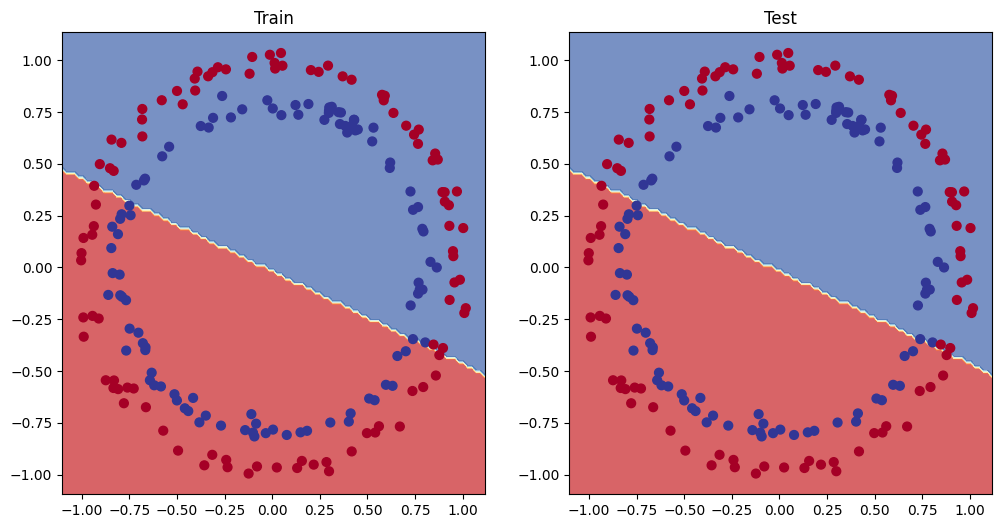

In [181]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(an_mod,X_test,Y_test)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(an_mod,X_test,Y_test)

###Preparing our data to see whether our model can predict a straight line or not:

one way to troubleshoot

In [ ]:
#creating the data(same as linear one)

weight=0.7
bias=0.3
start=0
end=1
step=0.01

X_reg=torch.arange(start,end,step).unsqueeze(dim=1)
Y_reg=X_reg*weight+bias

print((X_reg),(Y_reg))

In [183]:
X_split=int(len(X_reg)*0.8)
X_train_ch,Y_train_ch=X_reg[:X_split],X_reg[:X_split]
X_test_ch,Y_test_ch=X_reg[X_split:],X_reg[X_split:]

print(len(X_train_ch),len(X_test_ch),len(Y_train_ch),len(Y_test_ch))

80 20 80 20


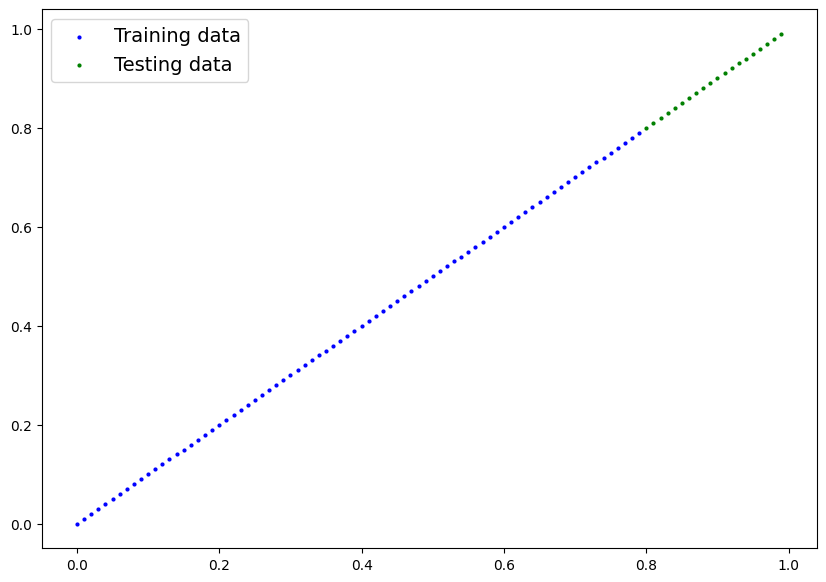

In [184]:
plot_predictions(train_data=X_train_ch,
                 train_labels=Y_train_ch,
                 test_data=X_test_ch,
                 test_labels=Y_test_ch)

In [185]:
#same architecture as our model with 2 hidden layers but with different way:
an_mode_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)
an_mode_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [189]:
loss_2=nn.L1Loss()
optimizer_2=torch.optim.SGD(params=an_mode_2.parameters(),
                            lr=0.01)
#training loop and testing loop:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train_ch,Y_train_ch=X_train_ch.to(device),Y_train_ch.to(device)
X_test_ch,Y_test_ch=X_test_ch.to(device),Y_test_ch.to(device)
for epoch in range(epochs):
  an_mode_2.train()
  y_pred=an_mode_2(X_train_ch)
  loss=loss_2(y_pred,Y_train_ch)
  optimizer_2.zero_grad()
  loss.backward()
  optimizer_2.step()

  an_mode_2.eval()

  with torch.inference_mode():
    y_pred_test=an_mode_2(X_test_ch)
    y_loss_test=loss_2(y_pred_test,Y_test_ch)

  if epoch % 100==0:
    print(f"Epoch:{epoch} | Training Loss: {loss:.5f} | Testing Loss: {y_loss_test:.5f}")

Epoch:0 | Training Loss: 0.01904 | Testing Loss: 0.00334
Epoch:100 | Training Loss: 0.01874 | Testing Loss: 0.00311
Epoch:200 | Training Loss: 0.01945 | Testing Loss: 0.00450
Epoch:300 | Training Loss: 0.01913 | Testing Loss: 0.00447
Epoch:400 | Training Loss: 0.01758 | Testing Loss: 0.00295
Epoch:500 | Training Loss: 0.01797 | Testing Loss: 0.00316
Epoch:600 | Training Loss: 0.01827 | Testing Loss: 0.00386
Epoch:700 | Training Loss: 0.01755 | Testing Loss: 0.00364
Epoch:800 | Training Loss: 0.01742 | Testing Loss: 0.00275
Epoch:900 | Training Loss: 0.01828 | Testing Loss: 0.00408


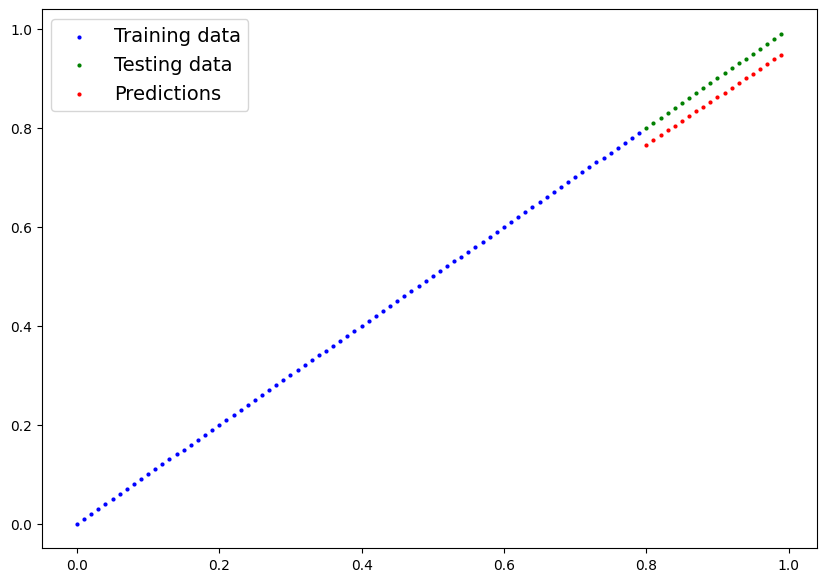

In [194]:
#visualization:
an_mode_2.eval()
with torch.inference_mode():
  y_pred=an_mode_2(X_test_ch)

plot_predictions(train_data=X_train_ch.cpu(),
                 train_labels=Y_train_ch.cpu(),
                 test_data=X_test_ch.cpu(),
                 test_labels=Y_test_ch.cpu(),
                 predictions=y_pred.cpu())

In [ ]:
#hence it proves that our model is able to learn..